In [296]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [297]:
# Step 1: Load the data
df = pd.read_csv('traffic volume.csv')

In [298]:
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [299]:
df.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [301]:
df['holiday'] = df['holiday'].fillna(df['holiday'].mode())

In [302]:
df['temp'] = df['temp'].fillna(df['temp'].mean())

In [303]:
df['rain'] = df['rain'].fillna(df['rain'].mean())

In [304]:
df['snow'] = df['snow'].fillna(df['snow'].mean())

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         62 non-null     object 
 1   temp            48204 non-null  float64
 2   rain            48204 non-null  float64
 3   snow            48204 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [306]:
from collections import Counter

In [307]:
print (Counter(df['weather']))
df['weather'].fillna('Clouds', inplace=True)

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


C:\Users\Admin\AppData\Local\Temp\ipykernel_11688\625391244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weather'].fillna('Clouds', inplace=True)


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         62 non-null     object 
 1   temp            48204 non-null  float64
 2   rain            48204 non-null  float64
 3   snow            48204 non-null  float64
 4   weather         48204 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [309]:
le = LabelEncoder()
for col in ['holiday', 'weather']:
    df[col] = le.fit_transform(df[col])

In [310]:
hm = df.select_dtypes(include='number').corr()
hm

,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,0.004237,0.000180,0.000872,-0.001448,0.036864
temp,0.004237,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000180,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000872,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.001448,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.036864,0.130034,0.004714,0.000735,-0.040035,1.000000


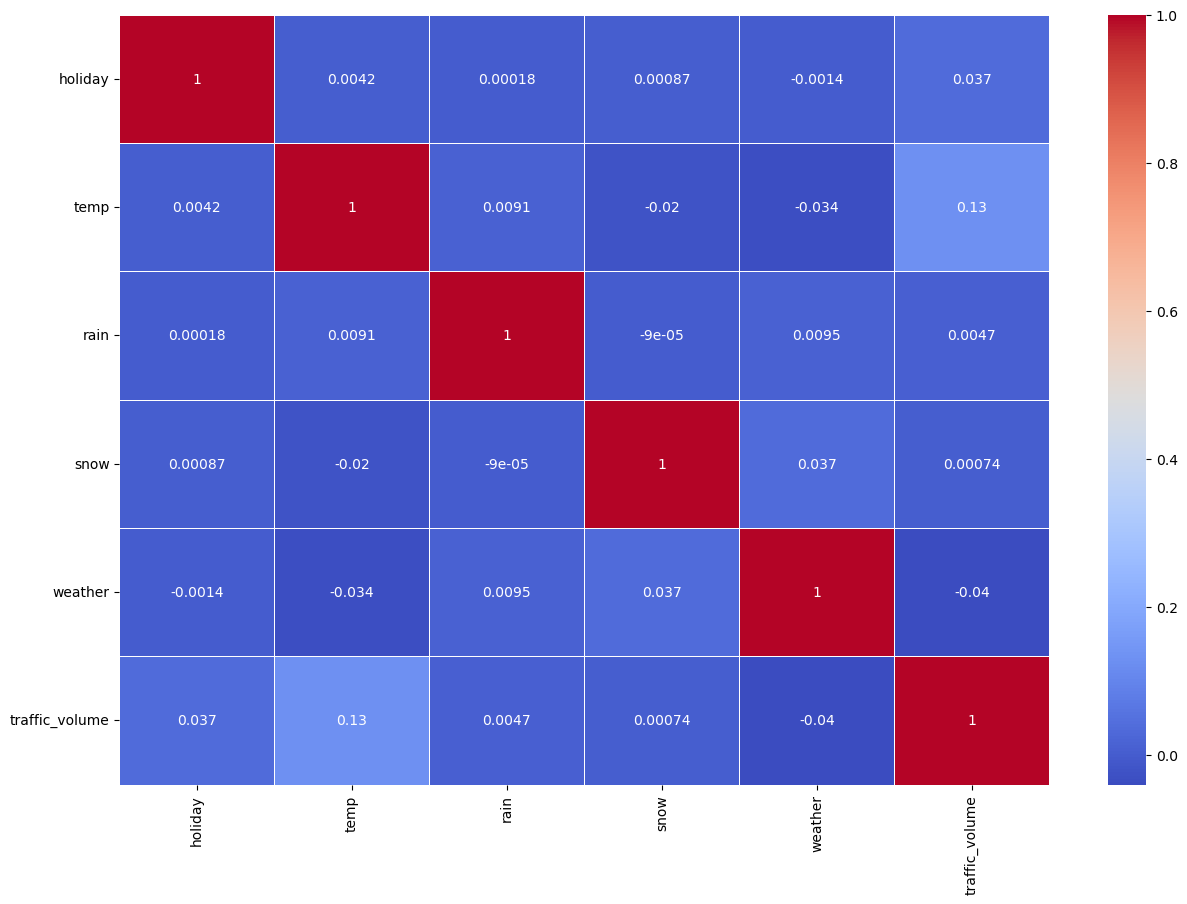

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(hm, annot=True, cmap="coolwarm", linewidths=0.5)
plt.gcf().set_size_inches(15, 10)  # Force set size in inches
plt.show()

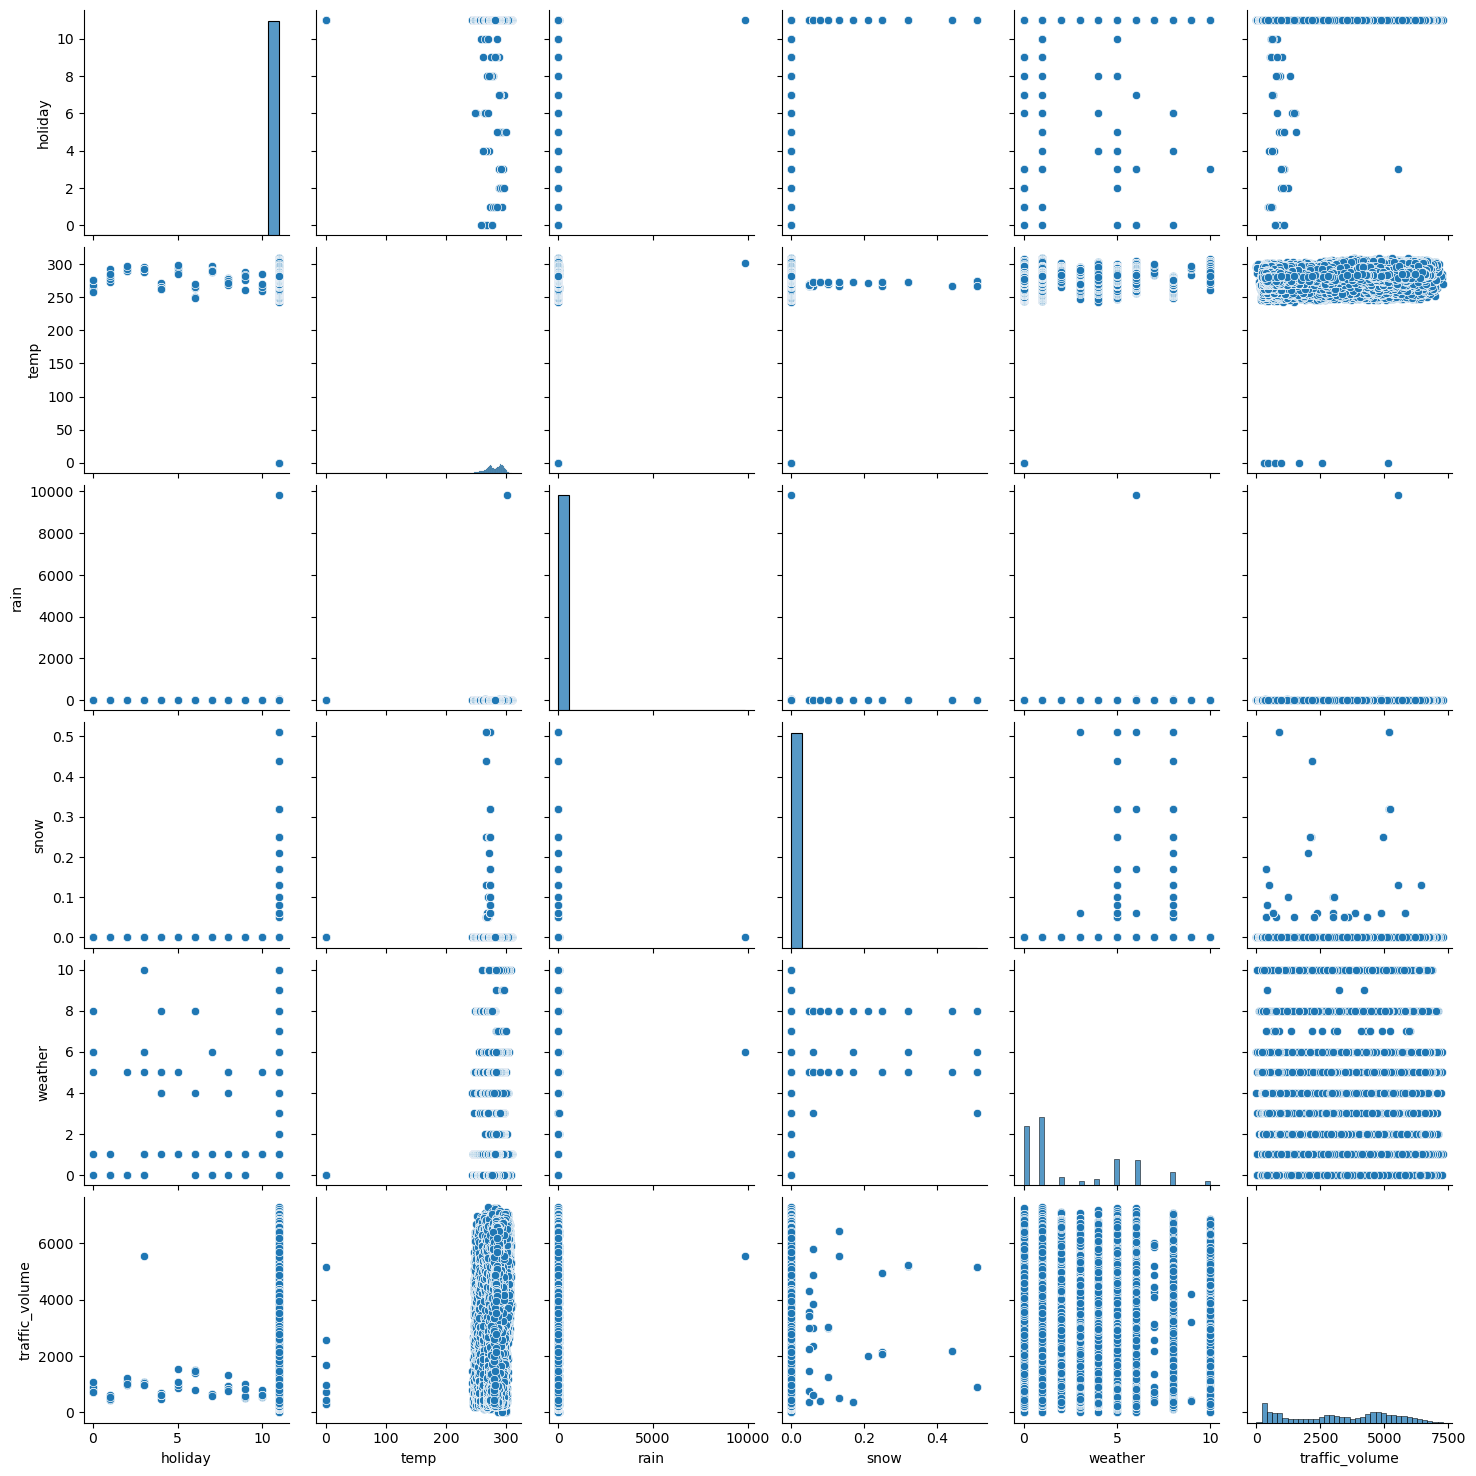

In [312]:
sns.pairplot(df)

<Axes: >

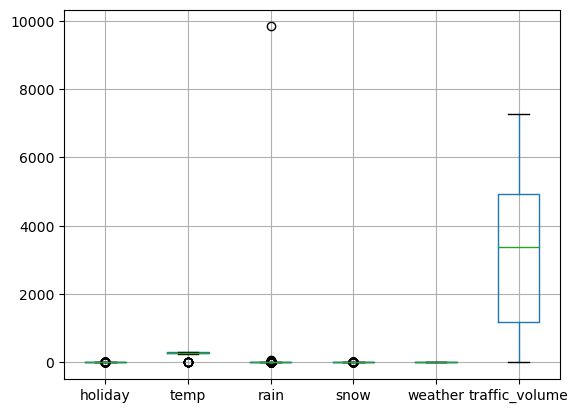

In [313]:
df.boxplot()

In [314]:
# Step 4: Convert 'date' and 'Time' columns to datetime features
df[["day" ,"month" , "year"]] =df["date"].str.split("-", expand=True)
df[["hours" ,"minutes" , "seconds"]] =df["Time"].str.split(":", expand=True)
df.drop(columns=["date" , "Time"],axis=1,inplace=True)

In [315]:
df.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,3,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [316]:
# Step 5: Define features and target
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

In [317]:
names=X.columns

In [318]:
from sklearn.preprocessing import scale

In [319]:
X=scale(X)

In [320]:
X=pd.DataFrame(X,columns=names)

In [321]:
# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

# Initialize models
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [323]:
lin_reg.fit(X_train, y_train)
Dtree.fit(X_train, y_train)
Rand.fit(X_train, y_train)
svr.fit(X_train, y_train)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [324]:
p1 = lin_reg.predict(X_train)
p2 = Dtree.predict(X_train)
p3 = Rand.predict(X_train)
p4 = svr.predict(X_train)
p5 = XGB.predict(X_train)

In [325]:
from sklearn import metrics

print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.5468569064844475
1.0
0.9756794115482345
-12.304475176047434
0.8469935655593872


In [326]:
p1 = lin_reg.predict(X_test)
p2 = Dtree.predict(X_test)
p3 = Rand.predict(X_test)
p4 = svr.predict(X_test)
p5 = XGB.predict(X_test)

# Evaluation
from sklearn import metrics

print(metrics.r2_score(p1, y_test))
print(metrics.r2_score(p2, y_test))
print(metrics.r2_score(p3, y_test))
print(metrics.r2_score(p4, y_test))
print(metrics.r2_score(p5, y_test))

-5.4951980576721215
0.7141442132687098
0.8137125533699553
-12.218934771174125
0.8096714615821838


In [327]:
# Randforest gives the best r-score value

# RMSE values
import numpy as np
MSE = metrics.mean_squared_error(p3, y_test)
np.sqrt(MSE)

779.1044428788858

In [340]:
import pickle

pickle.dump(Rand, open("E:/model.pkl", 'wb'))
pickle.dump(le, open("E:/encoder.pkl", 'wb'))